<a href="https://colab.research.google.com/github/SF-Noorullah/Exploratory-Data-Analysis-for-Covid-19/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('exploratory-data-analysis-for-covid-19-first-wave-around-the-globe')
jovian.set_colab_id('1D7FZBZSQOFpBlFGFaYBY4qytqoBl333j')

     |████████████████████████████████| 68 kB 3.2 MB/s 


# Exploratory Data Analysis for Covid-19 First Wave around the globe

The Purpose of this project is to analyze the effects of covid-19 first wave i.e. from January 1 to July 30 of 2020 around the globe by downloading the kaggle datasets. We will Visualize the variation in new cases, death ratio of countries on everyday basis in the mentioned time frame of 7 months. Then we will see the most affeted countries on the basis of total cases per million population and analyze them through the helper functions that will be created somewhere between the analysis.

In [4]:
# lets install jovian to save our work in the jupyter notebook
!pip install jovian --upgrade -q
import jovian
jovian.set_project('exploratory-data-analysis-for-covid-19-first-wave-around-the-globe')
jovian.set_colab_id('18FUyB4wgZt874S9u2L1mokP-dNK-VgL4')

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="exploratory-data-analysis-for-covid_19-first-wave-around-the-globe")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/noorullah-rizwann/exploratory-data-analysis-for-covid-19-first-wave-around-the-globe


'https://jovian.ai/noorullah-rizwann/exploratory-data-analysis-for-covid-19-first-wave-around-the-globe'

First we will install and import all the required libraies

In [6]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [7]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [9]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Downloading the Datasets from Kaggle

The datasets are available at https://www.kaggle.com/datasets/imdevskp/corona-virus-report

In [10]:
od.download('https://www.kaggle.com/datasets/imdevskp/corona-virus-report')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noorullahrizwan
Your Kaggle Key: ··········


100%|██████████| 19.0M/19.0M [00:00<00:00, 80.9MB/s]


In [11]:
os.listdir('corona-virus-report')

['usa_county_wise.csv',
 'worldometer_data.csv',
 'country_wise_latest.csv',
 'full_grouped.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv']

Lets create a pandas dataframe for the full_grouped_csv file in the above downlaoded folder of 'corona-virus-report'

In [12]:
covid_df=pd.read_csv('corona-virus-report/full_grouped.csv')

In [13]:
covid_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [14]:
covid_df.shape

(35156, 10)

In [15]:
covid_df['Country/Region'].nunique()

187

### Data Cleaning and Preparation

In [16]:
covid_df.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

Looks like there are no null values in the dataframe. We will move on without any data cleaning

### Creating a Dataframe for a Specific location

First of all, we will create a seperate dataframe for a Country of our choice and then analyze, manipulate and visualize the effects of covid 19 first wave on that country. I have gone with Pakistan

In [17]:
pak_df=covid_df[covid_df['Country/Region']=='Pakistan'].copy()

In [18]:
pak_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
128,2020-01-22,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean
315,2020-01-23,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean
502,2020-01-24,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean
689,2020-01-25,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean
876,2020-01-26,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...
34349,2020-07-23,Pakistan,270400,5763,219783,44854,1209,54,6608,Eastern Mediterranean
34536,2020-07-24,Pakistan,271887,5787,236596,29504,1487,24,16813,Eastern Mediterranean
34723,2020-07-25,Pakistan,273113,5822,237434,29857,1226,35,838,Eastern Mediterranean
34910,2020-07-26,Pakistan,273113,5822,237434,29857,0,0,0,Eastern Mediterranean


In [19]:
pak_df.Date

128      2020-01-22
315      2020-01-23
502      2020-01-24
689      2020-01-25
876      2020-01-26
            ...    
34349    2020-07-23
34536    2020-07-24
34723    2020-07-25
34910    2020-07-26
35097    2020-07-27
Name: Date, Length: 188, dtype: object

In [20]:
pak_df['Date']=pd.to_datetime(pak_df.Date)

In [21]:
pak_df['Date']

128     2020-01-22
315     2020-01-23
502     2020-01-24
689     2020-01-25
876     2020-01-26
           ...    
34349   2020-07-23
34536   2020-07-24
34723   2020-07-25
34910   2020-07-26
35097   2020-07-27
Name: Date, Length: 188, dtype: datetime64[ns]

In [22]:
pak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 128 to 35097
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            188 non-null    datetime64[ns]
 1   Country/Region  188 non-null    object        
 2   Confirmed       188 non-null    int64         
 3   Deaths          188 non-null    int64         
 4   Recovered       188 non-null    int64         
 5   Active          188 non-null    int64         
 6   New cases       188 non-null    int64         
 7   New deaths      188 non-null    int64         
 8   New recovered   188 non-null    int64         
 9   WHO Region      188 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 16.2+ KB


Lets see the total number of cases and deaths in the first covid wave in Pakistan

In [23]:
pak_df[['New cases', 'New deaths']].sum()

New cases     274289
New deaths      5842
dtype: int64

Now Let's see the trend of these two columns throughout the first wave through a line graph

Text(0.5, 1.0, 'Variation in new cases everyday in Pakistan')

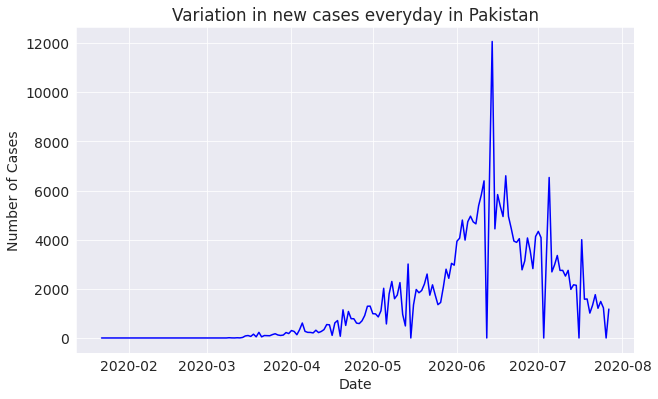

In [24]:
plt.plot(pak_df['Date'], pak_df['New cases'], c='b');

plt.xlabel('Date')
plt.ylabel('Number of Cases')

plt.title('Variation in new cases everyday in Pakistan')



It seems that between june and july, Pakistan had a substantial rise in the everyday covid cases

In [25]:
most_cases_df=pak_df.sort_values('New cases', ascending=False).head(5)[['Date','New cases']]
most_cases_df

,Date,New cases
27056,2020-06-14,12073
27991,2020-06-19,6604
30983,2020-07-05,6535
26869,2020-06-13,6472
26495,2020-06-11,6397


These are the five days with the most new cases in the first wave

As shown by the dataframe above, on June 14th 2020, were recorded the most new  cases.

Now we will visualize the number of deaths everyday throughout the first wave in Pakistan and see what we can conclude

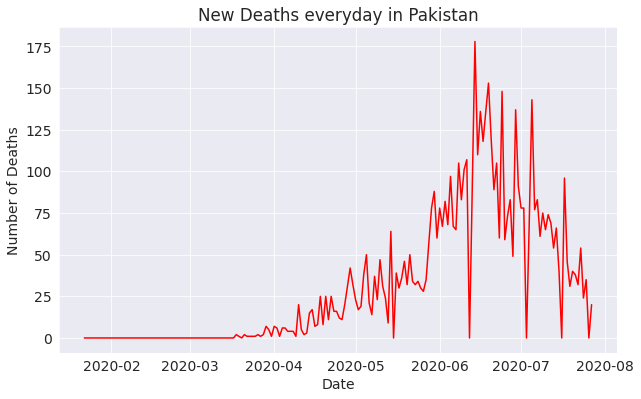

In [26]:
plt.plot(pak_df['Date'], pak_df['New deaths'], c='r');
plt.xlabel('Date');
plt.ylabel('Number of Deaths');

plt.title('New Deaths everyday in Pakistan');


In [27]:
pak_df.sort_values('New deaths', ascending=False).head(5)[['Date','New deaths']]

,Date,New deaths
27056,2020-06-14,178
27991,2020-06-19,153
28926,2020-06-24,148
30983,2020-07-05,143
29861,2020-06-29,137


As expected, the month of june recorded the most deaths in Pakistan on everyday basis

Now let's add a new coloumn 'Death_to_Case_Ratio' in our dataframe for pakistan to calculate the ratio of new deaths to new cases everyday in the first wave

In [28]:
pak_df['Death_to_Case_Ratio']=pak_df['New deaths']/pak_df['New cases']

In [29]:
pak_df['Death_to_Case_Ratio']=pak_df['Death_to_Case_Ratio'].fillna(0)

In [30]:
pak_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Death_to_Case_Ratio
128,2020-01-22,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.000000
315,2020-01-23,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.000000
502,2020-01-24,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.000000
689,2020-01-25,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.000000
876,2020-01-26,Pakistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
34349,2020-07-23,Pakistan,270400,5763,219783,44854,1209,54,6608,Eastern Mediterranean,0.044665
34536,2020-07-24,Pakistan,271887,5787,236596,29504,1487,24,16813,Eastern Mediterranean,0.016140
34723,2020-07-25,Pakistan,273113,5822,237434,29857,1226,35,838,Eastern Mediterranean,0.028548
34910,2020-07-26,Pakistan,273113,5822,237434,29857,0,0,0,Eastern Mediterranean,0.000000


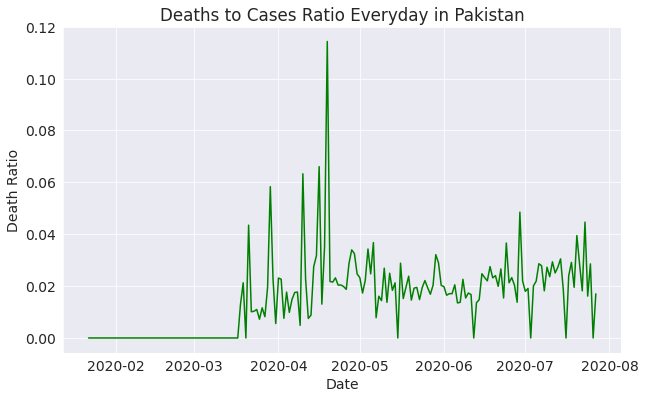

In [31]:
plt.plot(pak_df['Date'], pak_df['Death_to_Case_Ratio'], c='g');
plt.xlabel('Date');
plt.ylabel('Death Ratio');

plt.title('Deaths to Cases Ratio Everyday in Pakistan');

In [32]:
pak_df.sort_values('Death_to_Case_Ratio', ascending=False).head(5)[['Date', 'Death_to_Case_Ratio']]

,Date,Death_to_Case_Ratio
16584,2020-04-19,0.114286
16023,2020-04-16,0.066038
14901,2020-04-10,0.063291
12657,2020-03-29,0.058333
29861,2020-06-29,0.048496


Although the month of June had recorded the most new cases and new deaths, the greatest death ratios were observed in the month of april 

These numbers are for Pakistan only. What if we wanted to know the death ratio for any country we wish with the necessary plots? 

### Helper Functions

We should have a helper function that takes in the name of the country as a parameter, creates a dataframe for the respective country and does the analysis for the death ratio with plots just like I did with Pakistan

In [33]:
def country_covid_death_ratio(country_name):
  df=covid_df[covid_df['Country/Region']==country_name].copy()
  df['Date']=pd.to_datetime(df.Date)
  df['Death_to_Case_Ratio']=df['New deaths']/df['New cases']
  df['Death_to_Case_Ratio']=df['Death_to_Case_Ratio'].fillna(0)
  plt.plot(df['Date'], df['Death_to_Case_Ratio'], c='g');
  plt.xlabel('Date');
  plt.ylabel('Death Ratio');
  plt.title('Deaths to Cases Ratio Everyday in '+ country_name);

  



Now we have created the helper function, we just need to call it and pass the name of the country. Lets see how it works

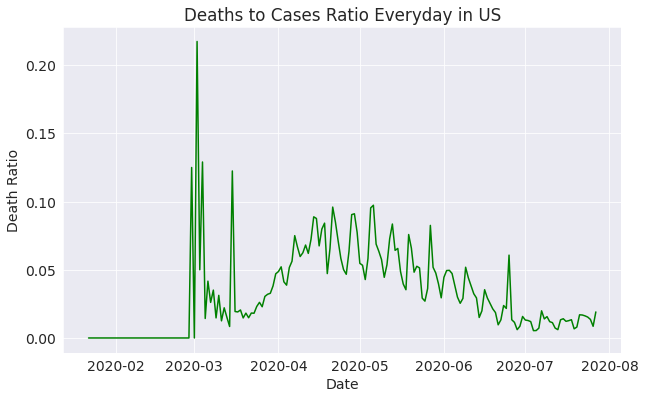

In [34]:
country_covid_death_ratio('US')

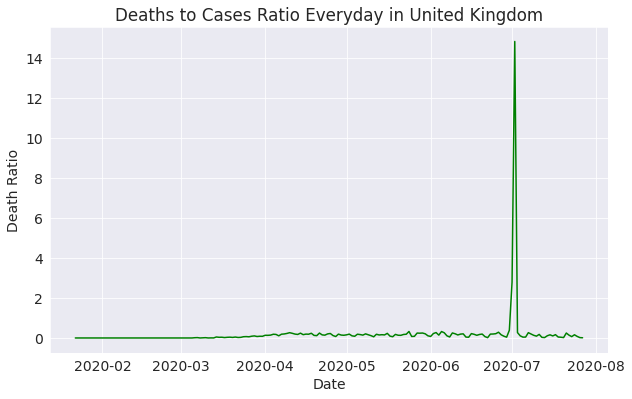

In [35]:
country_covid_death_ratio('United Kingdom')

Similarly we can have a helper function for the variation in number of cases everyday for any mentioned country

In [36]:
def country_covid_new_cases(country_name):
  df=covid_df[covid_df['Country/Region']==country_name].copy()
  df['Date']=pd.to_datetime(df.Date)
  plt.plot(df['Date'], df['New cases'], c='b')
  plt.xlabel('Date')
  plt.ylabel('Number of Cases')
  plt.title('Variation in new cases everyday in '+ country_name)
  df['Most_cases']=df['New cases']
  return df.sort_values('Most_cases', ascending=False).head(1)[['Date', 'Most_cases']]

,Date,Most_cases
33085,2020-07-16,77255


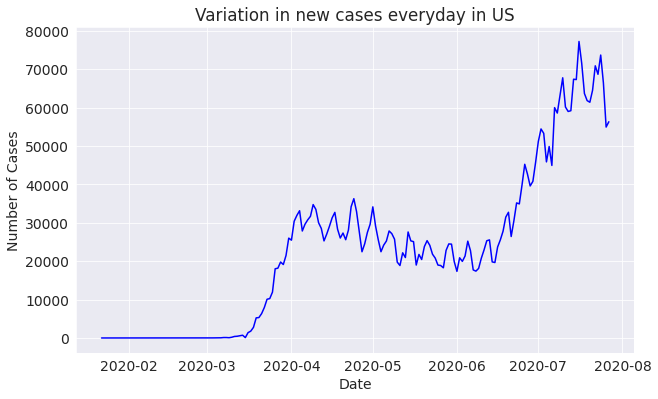

In [37]:
country_covid_new_cases('US')

,Date,Most_cases
17194,2020-04-22,5505


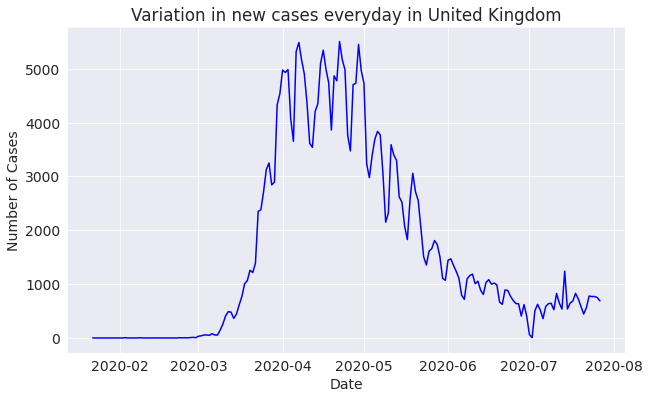

In [38]:
country_covid_new_cases('United Kingdom')

,Date,Most_cases
27056,2020-06-14,12073


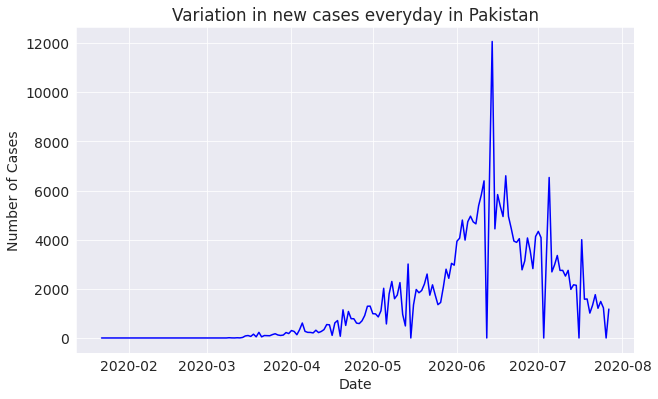

In [39]:
country_covid_new_cases('Pakistan')

We now have two functions(country_covid_new_cases & country_covid_death_ratio) through which we can analyze and visualize the effect of Covid 19 first wave from january to July 2020

### Merging Dataframes

To determine Total cases per million population, we need the population of every country. The population of countries is present in worldometer.csv file. We will convert this into a dataframe and merge it with our covid_df and then create a New dataframe with Total new cases, Total new deaths, population, and cases per million population

In [40]:
populations_df=pd.read_csv('corona-virus-report/worldometer_data.csv')
populations_df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [41]:
merged_df=covid_df.copy().merge(populations_df.copy(), on='Country/Region')

In [42]:
Total_df1=merged_df.groupby('Country/Region')[['New cases', 'New deaths']].sum()
Total_df1

,New cases,New deaths
Country/Region,,
Afghanistan,36263,1269
Albania,4880,144
Algeria,27973,1163
Andorra,907,52
Angola,950,41
...,...,...
Vietnam,431,0
Western Sahara,10,1
Yemen,1691,483


In [43]:
Total_df2=merged_df.groupby('Country/Region')[['Population']].mean()
Total_df2

,Population
Country/Region,
Afghanistan,39009447.0
Albania,2877470.0
Algeria,43926079.0
Andorra,77278.0
Angola,32956300.0
...,...
Vietnam,97425470.0
Western Sahara,598682.0
Yemen,29886897.0


In [44]:
Total_df=Total_df1.merge(Total_df2, on='Country/Region')
Total_df

,New cases,New deaths,Population
Country/Region,,,
Afghanistan,36263,1269,39009447.0
Albania,4880,144,2877470.0
Algeria,27973,1163,43926079.0
Andorra,907,52,77278.0
Angola,950,41,32956300.0
...,...,...,...
Vietnam,431,0,97425470.0
Western Sahara,10,1,598682.0
Yemen,1691,483,29886897.0


### Adding a new column to merged Dataframe

Now that we have the dataframe with population of every country, we can add another column 'Cases_per_million_pop' to determine which country was most affected in the first wave of Covid-19

In [45]:
Total_df['Cases_per_million_pop']=(Total_df['New cases']*1000000)/Total_df['Population']
Total_df

,New cases,New deaths,Population,Cases_per_million_pop
Country/Region,,,,
Afghanistan,36263,1269,39009447.0,929.595336
Albania,4880,144,2877470.0,1695.934276
Algeria,27973,1163,43926079.0,636.819872
Andorra,907,52,77278.0,11736.846192
Angola,950,41,32956300.0,28.826051
...,...,...,...,...
Vietnam,431,0,97425470.0,4.423894
Western Sahara,10,1,598682.0,16.703358
Yemen,1691,483,29886897.0,56.579979


Lets see 10 countries with the greatest cases per million population

In [46]:
Total_df.sort_values('Cases_per_million_pop', ascending=False).head(10)

,New cases,New deaths,Population,Cases_per_million_pop
Country/Region,,,,
Qatar,109597,165,2807805.0,39032.981279
Bahrain,39482,141,1706669.0,23133.952747
San Marino,708,42,33938.0,20861.571100
Chile,347923,9187,19132514.0,18184.907639
Oman,77058,393,5118446.0,15054.960041
Kuwait,64379,438,4276658.0,15053.576882
Panama,61442,1322,4321282.0,14218.465724
Armenia,37390,711,2963811.0,12615.514282
Peru,389717,18418,33016319.0,11803.768918


Now we can use our helper functions to analyze/visualize variation in cases, death ratio on everyday basis for the most affected countries as shown in the above dataframe

,Date,Most_cases
24259,2020-05-30,2355


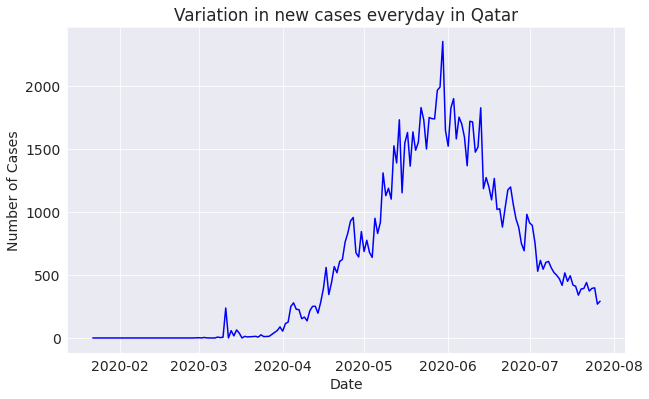

In [47]:
country_covid_new_cases('Qatar')
 

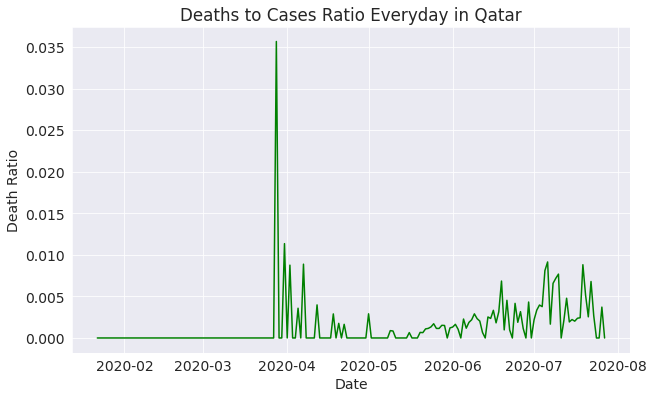

In [48]:
country_covid_death_ratio('Qatar')

,Date,Most_cases
25467,2020-06-06,13990


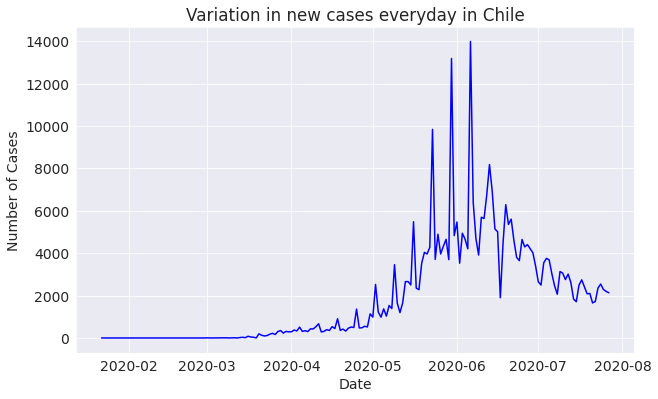

In [49]:
country_covid_new_cases('Chile')

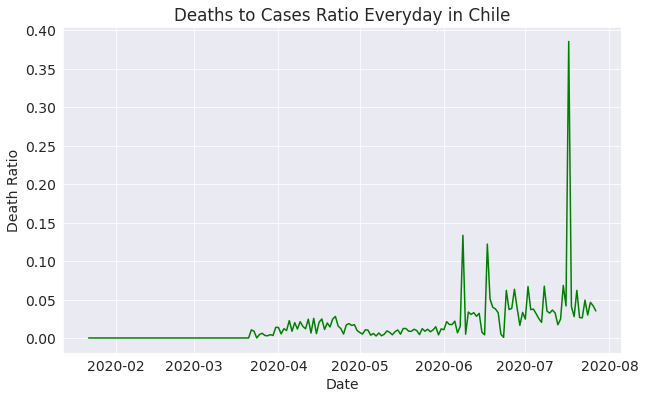

In [50]:
country_covid_death_ratio('Chile')

### Most Total Cases

Lets see which countries had the most number of total cases at the end of July 31st

In [51]:
covid_df.groupby('Country/Region')[['New cases']].sum().sort_values('New cases', ascending=False).head(10)[['New cases']]

,New cases
Country/Region,
US,4290258
Brazil,2442375
India,1480073
Russia,816680
South Africa,452529
Mexico,395489
Peru,389717
Chile,347923
United Kingdom,301708


## Conclusion

We can see, Qatar was the most affected country with the highest Total Cases per million Population in the first wave of Covid-19 followed by Bahrain and San marino. However, US had the most number of Total Cases. This was my Exploratory Data Analysis on the effet of Covid 19 first wave around the globe

In [52]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/noorullah-rizwann/exploratory-data-analysis-for-covid-19-first-wave-around-the-globe


'https://jovian.ai/noorullah-rizwann/exploratory-data-analysis-for-covid-19-first-wave-around-the-globe'